##  Simple Linear Regression for Student_scores data using siket learn

### Import Packages

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load and Inspect Data

In [144]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [60]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
df.shape

(25, 2)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
df.duplicated().sum()

0

### EDA

In [24]:
df.describe().round(1)

,Hours,Scores
count,25.0,25.0
mean,5.0,51.5
std,2.5,25.3
min,1.1,17.0
25%,2.7,30.0
50%,4.8,47.0
75%,7.4,75.0
max,9.2,95.0


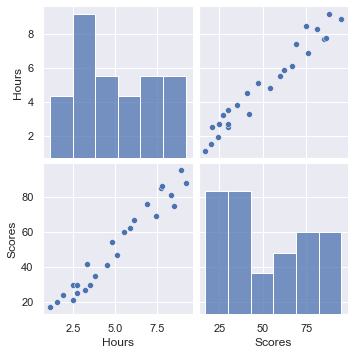

In [26]:
sns.pairplot(df)

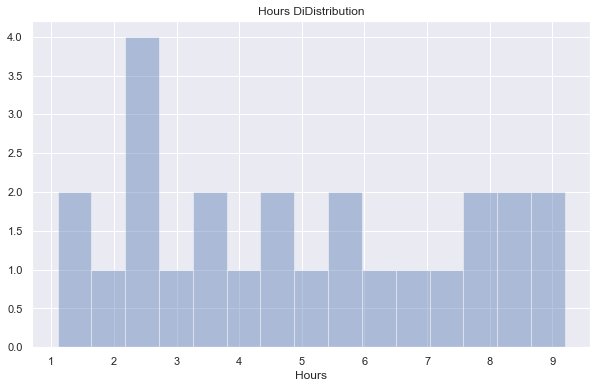

In [30]:
plt.figure(figsize=(10,6))
plt.title('Hours DiDistribution')
sns.distplot(df['Hours'],bins=15,kde=False)
plt.show()

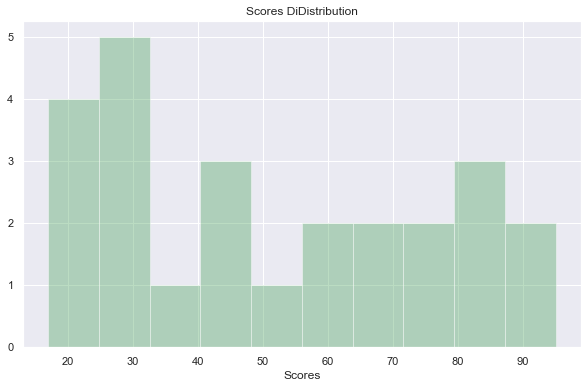

In [32]:
plt.figure(figsize=(10,6))
plt.title('Scores DiDistribution')
sns.distplot(df['Scores'],bins=10,kde=False,color='g')
plt.show()

<AxesSubplot: title={'center': 'Hours VS Scores'}, xlabel='Hours', ylabel='Scores'>

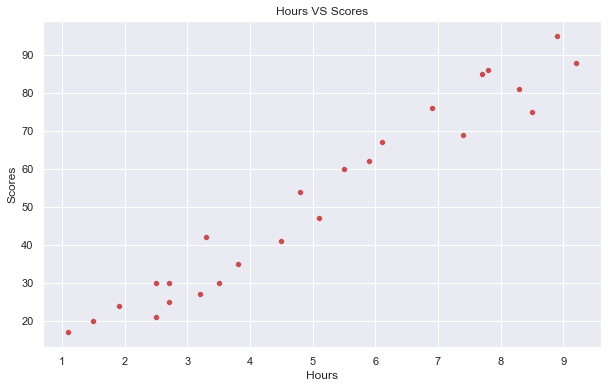

In [38]:
plt.figure(figsize=(10,6))
plt.title('Hours VS Scores')
sns.scatterplot(data=df,x='Hours',y='Scores',color='r')

<AxesSubplot: xlabel='Hours', ylabel='Scores'>

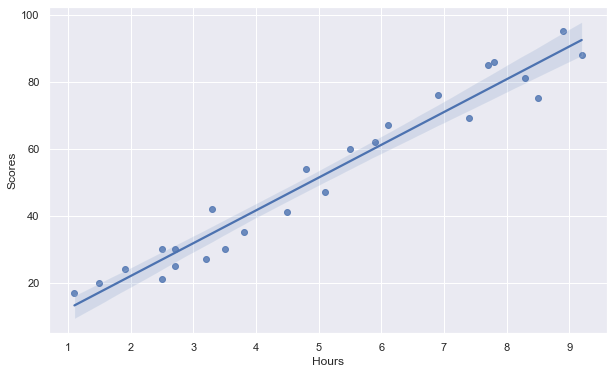

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='Hours',y='Scores')

<Figure size 720x432 with 0 Axes>

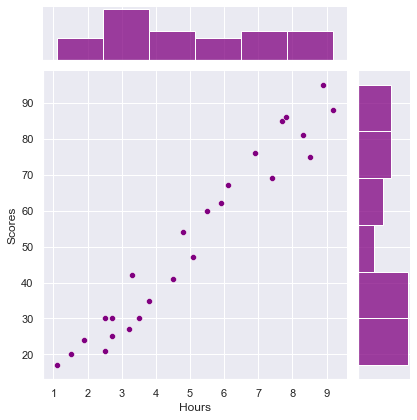

In [43]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df,x='Hours',y='Scores',color='purple')

<Figure size 720x432 with 0 Axes>

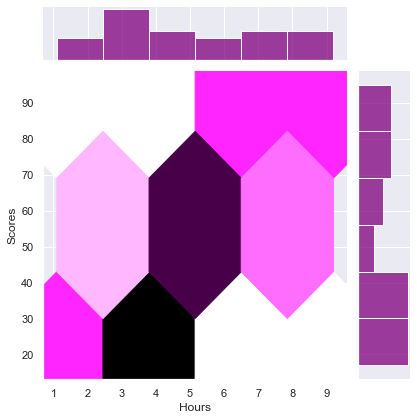

In [45]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df,x='Hours',y='Scores',color='purple',kind='hex')

<AxesSubplot: >

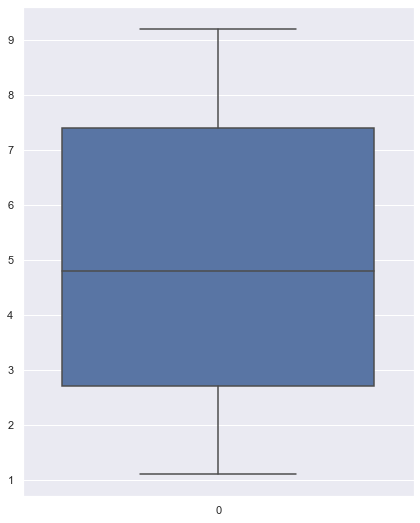

In [49]:
plt.figure(figsize=(7,9))
sns.boxplot(df['Hours'])

<AxesSubplot: >

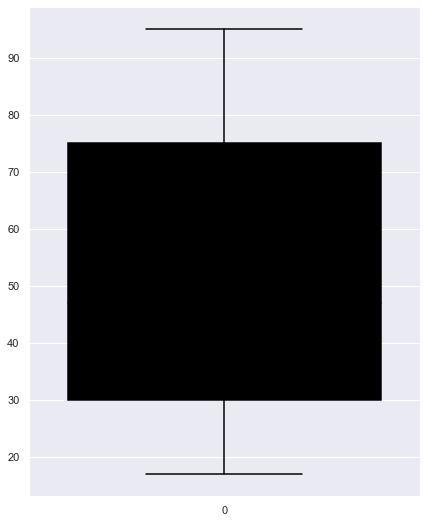

In [50]:
plt.figure(figsize=(7,9))
sns.boxplot(df['Scores'],color='black')

<AxesSubplot: >

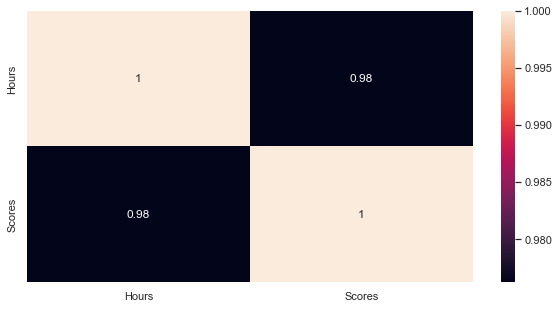

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### Model Building & Training 

In [150]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
model = LinearRegression()

In [153]:
model.fit(X_train, y_train)

LinearRegression()

In [156]:
predictions = model.predict(X_test)

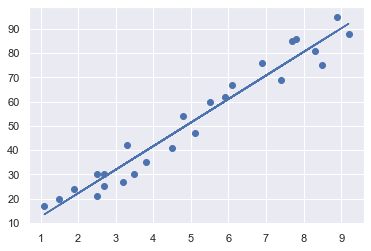

In [159]:
z = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, z);
plt.show()

### Model Evaluation

In [80]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',RMSE)

RMSE:  6.226222329942877


In [81]:
MSE = metrics.mean_squared_error(y_test,predictions)
print('MSE: ',MSE)

MSE:  38.765844501879315


In [82]:
MAE = metrics.mean_absolute_error(y_test,predictions)
print('MAE: ',MAE)

MAE:  5.807741017236241


In [164]:
mevs = metrics.explained_variance_score(y_test,predictions)
print('MEVS: ',mevs)

MEVS:  0.948770551799546


# 